# Logistic Regression Keras vs Sklearn

In [1]:
import time 
import numpy as np
import pandas as pd 
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 

# Getting the data

In [2]:
from keras.datasets import mnist 
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


# Reshaping and normalizing the inputs

In [3]:
input_dim = 784 #28*28 
X_train = X_train.reshape(60000, input_dim) 
X_test = X_test.reshape(10000, input_dim) 
x_train = X_train.astype('float32') 
x_test = X_test.astype('float32') 
x_train /= 255 
x_test /= 255

In [4]:
y_train[y_train != 3] = 0
y_train[y_train == 3] = 1

In [5]:
y_test[y_test != 3] = 0
y_test[y_test == 3] = 1

# Convert class vectors to binary class matrices


Build Keras Logistic Regression 
- Settings

In [6]:
batch_size = 256 
nb_epoch = 30
optimizer = "adam"

Without L1 Regularization

In [7]:
from keras import regularizers
from keras.models import Sequential 
from keras.layers import Dense, Activation 
start = time.time()
model = Sequential() 
model.add(Dense(1, input_dim=input_dim, activation='sigmoid', kernel_regularizer=regularizers.l1(0.00))) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(x_test, y_test)) 
pred_test = model.predict(x_test).reshape([-1])>0.5
time_cost = time.time() - start

print("Time Cost of Logistic Regression: ", time_cost)
print("Accuracy: ", np.mean(pred_test == y_test))

/home/r7user1/anaconda2_local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 13us/step - loss: 0.2572 - acc: 0.9128 - val_loss: 0.1614 - val_acc: 0.9512
Epoch 2/30
60000/60000 [==============================] - 1s 11us/step - loss: 0.1441 - acc: 0.9554 - val_loss: 0.1220 - val_acc: 0.9624
Epoch 3/30
60000/60000 [==============================] - 1s 11us/step - loss: 0.1209 - acc: 0.9628 - val_loss: 0.1069 - val_acc: 0.9666
Epoch 4/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1103 - acc: 0.9661 - val_loss: 0.0981 - val_acc: 0.9701
Epoch 5/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1041 - acc: 0.9682 - val_loss: 0.0924 - val_acc: 0.9718
Epoch 6/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1000 - acc: 0.9694 - val_loss: 0.0891 - val_acc: 0.9733
Epoch 7/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.0971 - acc: 0.9703 - val_loss: 0.0861 - val_acc

With L1 Regularization

In [8]:
start = time.time()
model = Sequential() 
model.add(Dense(1, input_dim=input_dim, activation='sigmoid', kernel_regularizer=regularizers.l1(0.001))) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(x_test, y_test)) 
pred_test = model.predict(x_test).reshape([-1])>0.5
time_cost = time.time() - start

print("Time Cost of Logistic Regression: ", time_cost)
print("Accuracy: ", np.mean(pred_test == y_test))

/home/r7user1/anaconda2_local/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.3074 - acc: 0.9004 - val_loss: 0.2051 - val_acc: 0.9410
Epoch 2/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1874 - acc: 0.9503 - val_loss: 0.1677 - val_acc: 0.9572
Epoch 3/30
60000/60000 [==============================] - 1s 13us/step - loss: 0.1653 - acc: 0.9589 - val_loss: 0.1530 - val_acc: 0.9624
Epoch 4/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1554 - acc: 0.9620 - val_loss: 0.1452 - val_acc: 0.9663
Epoch 5/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1497 - acc: 0.9639 - val_loss: 0.1405 - val_acc: 0.9670
Epoch 6/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1460 - acc: 0.9654 - val_loss: 0.1374 - val_acc: 0.9694
Epoch 7/30
60000/60000 [==============================] - 1s 11us/step - loss: 0.1434 - acc: 0.9663 - val_loss: 0.1350 - val_acc

Text(0,0.5,'Accuracy')

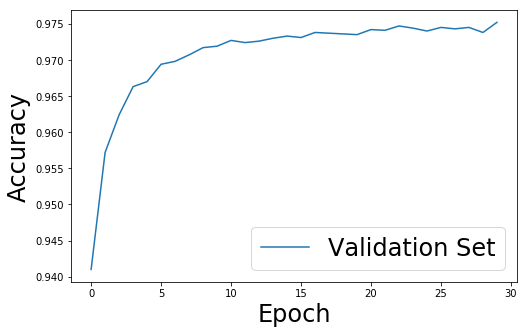

In [9]:
test_acc  = history.history['val_acc']
xc        = history.epoch

plt.figure(figsize=(8,5))
plt.plot(xc, test_acc)
plt.legend(["Validation Set"],fontsize=24)
plt.xlabel("Epoch",fontsize=24)
plt.ylabel("Accuracy",fontsize=24)

# SKlearn Logistic Regression

Without L1 Regularization

In [10]:
from sklearn.linear_model import LogisticRegression

start = time.time()
lr = LogisticRegression(penalty="l1", C = 1000000000000000)
lr.fit(x_train, y_train)
pred_test = lr.predict(x_test)
time_cost = time.time() - start

print("Time Cost of Logistic Regression: ", time_cost)
print("Accuracy: ", np.mean(pred_test == y_test))

/home/r7user1/anaconda2_local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


('Time Cost of Logistic Regression: ', 11.690162897109985)
('Accuracy: ', 0.9776)


With L1 Regularization

In [11]:
from sklearn.linear_model import LogisticRegression

start = time.time()
lr = LogisticRegression(penalty="l1", C = 1000)
lr.fit(x_train, y_train)
pred_test = lr.predict(x_test)
time_cost = time.time() - start

print("Time Cost of Logistic Regression: ", time_cost)
print("Accuracy: ", np.mean(pred_test == y_test))

('Time Cost of Logistic Regression: ', 11.077100038528442)
('Accuracy: ', 0.9778)
